In [29]:
import numpy as np

In [30]:
import bnpy

In [32]:
from matplotlib import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
import seaborn as sns;

In [34]:
def make_ring_data(N=100):
    prng = np.random.RandomState(0)
    # Choose random angle (radians) and random radius (1 to 2)
    angles_rad_N = 2 * np.pi * prng.rand(N)
    radii_N = 2 + 1.0 * prng.rand(N)
    X_N2 = radii_N[:,np.newaxis] * np.vstack([np.cos(angles_rad_N), np.sin(angles_rad_N)]).T
    prng.shuffle(X_N2)
    data = bnpy.data.XData(X_N2)
    return data

In [35]:
data = make_ring_data(2000)

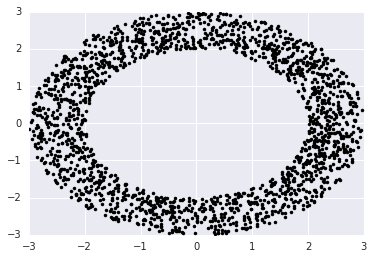

In [37]:
pylab.plot(data.X[:,0], data.X[:,1], 'k.')

In [38]:
info_list = list()
for ii in xrange(1):
    GP, info_dict = bnpy.train_model(
        data, 'dp_mix_vb', 'gauss_diag_covar_vb', 'coord_descent_with_moves',
        n_laps=200,
        K=50,
        move_names='split,merge',
        m_start_lap=3.0,
        init_procedure='LP_from_rand_examples',
        seed=ii)
    info_list.append(info_dict)

User input
-- K 50
-- init_procedure LP_from_rand_examples
-- m_start_lap 3.0
-- move_names split,merge
-- n_laps 200
-- seed 0
Dataset
  num examples: 2000
  num dims: 2
Initialization
Unrecognized kwarg m_start_lap 3.0
Training...
loss= 3.170e+03 after global update
[  2.36896726e+02   1.67685306e+02   1.60981873e+02   1.80462153e+02
   3.19319542e+02   2.82745486e+02   1.25114842e+02   4.78068116e+00
   1.22136368e+00   2.27203787e+02   5.44543094e+01   1.23212858e+01
   1.45622811e+01   1.58490973e+01   2.66172884e+01   5.67056295e+01
   3.62718707e-03   6.31753241e+00   6.29148908e-02   1.97131526e-03
   4.01730425e-05   1.27143239e+00   2.00708783e-05   1.05372032e+02
   1.87850242e-04   2.12491360e-03   3.87774293e-02   6.14914007e-04
   1.94388703e-06   5.59761055e-07   3.11903548e-08   8.98515246e-07
   1.42820493e-07   3.38619807e-03   2.58442122e-06   1.11881148e-03
   2.87877275e-09   2.03614288e-03   1.19483527e-13   4.17054713e-09
   3.65357114e-06   4.21122165e-05   2.29

In [41]:
common_GP = bnpy.alloc_models.hierarchical_model.to_common_params(
    [bnpy.obs_models.gauss_diag_covar_vb_posterior_estimator, bnpy.alloc_models.dp_mix_vb_posterior_estimator],
    GP)

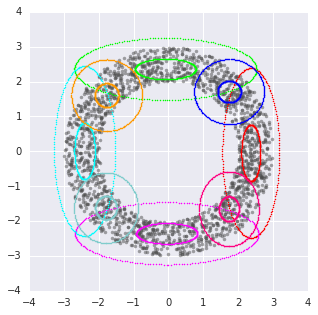

In [53]:
bnpy.viz.gauss_viz.plot_gauss_2D_from_common_params(
    data=data, **common_GP)
pylab.gcf().set_size_inches((5,5))
pylab.gca().set_aspect('equal');